In [ ]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from keras.datasets import fashion_mnist
import keras.models as models
import keras.layers as layers
from keras import regularizers
from keras.layers import Dropout

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense,Activation,Flatten,Dropout,Conv2D, MaxPooling2D, LeakyReLU
from tensorflow.keras.utils import to_categorical   #for the categorical data

In [ ]:
print(keras.__version__)

In [ ]:
#import the dataset #x: Images and Y: labels of the images
(train_X,train_Y),(test_X,test_Y)=fashion_mnist.load_data()

In [ ]:
plt.imshow(train_X[0])
print(train_Y[0])

In [ ]:
print(train_X.shape,train_Y.shape)

In [ ]:
print(test_X.shape, test_Y.shape)

In [ ]:
classes=np.unique(train_Y)
nClasses=len(classes)
print(classes)
print(nClasses)

In [ ]:
train_X=train_X.reshape(-1,28,28,1)
test_X=test_X.reshape(-1,28,28,1)

In [ ]:
print(train_X.shape,train_Y.shape)
print(test_X.shape, test_Y.shape)

In [ ]:
#Range of pixel values for each type of image
#Black-White: 0-1
#Grayscale: 0-255
#RGB: (0-255)*3

In [ ]:
#converting the values of the pixels from 0-1
#type-conversion
train_X=train_X.astype('float32')
test_X=test_X.astype('float32')
train_X=train_X/255
test_X=test_X/255

In [ ]:
train_Y_one_hot=to_categorical(train_Y)
test_Y_one_hot=to_categorical(test_Y)

In [ ]:
train_Y[0]

In [ ]:
train_Y_one_hot[0]

In [ ]:
#Model training task

In [ ]:
from sklearn.model_selection import train_test_split
train_X,valid_X,train_label,valid_label=train_test_split(train_X,train_Y_one_hot,test_size=0.2,random_state=13)

In [ ]:
train_X.shape,valid_X.shape,train_label.shape,valid_label.shape

In [ ]:
#Basic CNN model Develop
#Regularization and Dropout
#2nd CNN MODEL DEVELOPMENT

In [ ]:
batch_size=64
epochs=20
num_classes=10

In [ ]:
model=tf.keras.Sequential()

In [ ]:
#1st hidden layer
model.add(tf.keras.layers.Conv2D(32,(3,3),activation="linear",padding='same'))
model.add(tf.keras.layers.LeakyReLU(alpha=0.1))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2),padding='same'))

In [ ]:
#2nd hidden layer
model.add(tf.keras.layers.Conv2D(64,(3,3),activation="linear",padding='same'))
model.add(tf.keras.layers.LeakyReLU(alpha=0.1))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2),padding='same'))

In [ ]:
#3rd hidden layer
model.add(tf.keras.layers.Conv2D(128,(3,3),activation="linear",padding='same'))
model.add(tf.keras.layers.LeakyReLU(alpha=0.1))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2),padding='same'))

In [ ]:
model.add(tf.keras.layers.Flatten())

In [ ]:
model.add(tf.keras.layers.Dense(128,activation='linear'))
model.add(tf.keras.layers.LeakyReLU(alpha=0.1))
model.add(tf.keras.layers.Dense(num_classes,activation='softmax'))#output final layer

In [ ]:
model.compile(loss=tf.keras.losses.categorical_crossentropy,optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])

In [ ]:
48000/64

In [29]:
model_train=model.fit(train_X,train_label,batch_size=64,epochs=20,verbose=1,validation_data=(valid_X,valid_label))

750/750 ━━━━━━━━━━━━━━━━━━━━ 31s 41ms/step - accuracy: 0.9214 - loss: 0.2126 - val_accuracy: 0.9127 - val_loss: 0.2416
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 30s 39ms/step - accuracy: 0.9333 - loss: 0.1804 - val_accuracy: 0.9161 - val_loss: 0.2293
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 32s 42ms/step - accuracy: 0.9405 - loss: 0.1611 - val_accuracy: 0.9128 - val_loss: 0.2505
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 30s 40ms/step - accuracy: 0.9470 - loss: 0.1436 - val_accuracy: 0.9183 - val_loss: 0.2466
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 30s 39ms/step - accuracy: 0.9554 - loss: 0.1224 - val_accuracy: 0.9198 - val_loss: 0.2508
Epoch 9/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 29s 39ms/step - accuracy: 0.9634 - loss: 0.1004 - val_accuracy: 0.9208 - val_loss: 0.2558
Epoch 10/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 29s 39ms/step - accuracy: 0.9680 - loss: 0.0847 - val_accuracy: 0.9229 - val_loss: 0.2583
Epoch 11/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 28s 38ms/step - accuracy: 0.9750 - loss: 0.0679 - val_accur

In [30]:
testing_evaluation=model.evaluate(test_X,test_Y_one_hot)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9085 - loss: 0.4823


In [31]:
testing_evaluation  #loss,accuracy

[0.4637986421585083, 0.9110000133514404]

In [32]:
model_train.history

{'accuracy': [0.8327916860580444,
  0.8942291736602783,
  0.9098333120346069,
  0.9206874966621399,
  0.9309583306312561,
  0.9392708539962769,
  0.9472916722297668,
  0.9536041617393494,
  0.9604791402816772,
  0.965666651725769,
  0.9722499847412109,
  0.9748125076293945,
  0.9782708287239075,
  0.9811041951179504,
  0.9836458563804626,
  0.9852083325386047,
  0.9854583144187927,
  0.9874374866485596,
  0.9881458282470703,
  0.989104151725769],
 'loss': [0.4604475200176239,
  0.2902175486087799,
  0.24182957410812378,
  0.2132166475057602,
  0.18594422936439514,
  0.16372157633304596,
  0.14221592247486115,
  0.12485421448945999,
  0.10433872789144516,
  0.09145388007164001,
  0.07286780327558517,
  0.06758926063776016,
  0.0576162226498127,
  0.051278360188007355,
  0.04362637177109718,
  0.03889814391732216,
  0.03866596892476082,
  0.03337308019399643,
  0.031068598851561546,
  0.03024386800825596],
 'val_accuracy': [0.8869166374206543,
  0.903166651725769,
  0.909333348274231,
  

In [33]:
accuracy=model_train.history['accuracy']
val_accuracy=model_train.history['val_accuracy']
loss=model_train.history['loss']
val_loss=model_train.history['val_loss']
epochs=range(len(accuracy))

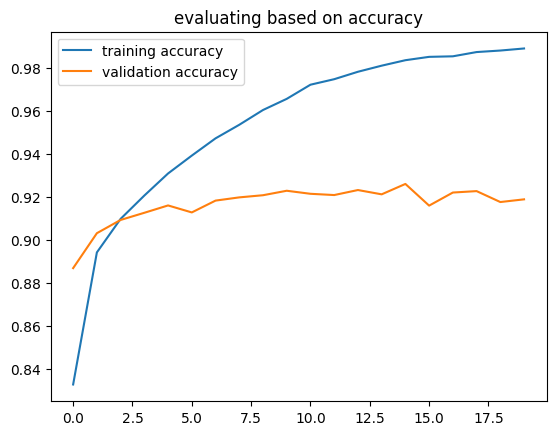

In [34]:
plt.plot(epochs,accuracy,label='training accuracy')
plt.plot(epochs,val_accuracy,label='validation accuracy')
plt.title('evaluating based on accuracy')
plt.legend()
plt.show()

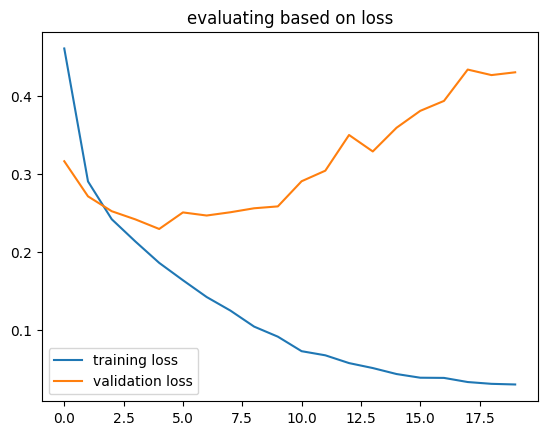

In [35]:
plt.plot(epochs,loss,label='training loss')
plt.plot(epochs,val_loss,label='validation loss')
plt.title('evaluating based on loss')
plt.legend()
plt.show()

Regularization

In [36]:
regmodel=tf.keras.Sequential()
#1st hidden layer
regmodel.add(tf.keras.layers.Conv2D(32,(3,3),activation="linear",padding='same'))
regmodel.add(tf.keras.layers.LeakyReLU(alpha=0.1))
regmodel.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2),padding='same'))
regmodel.add(tf.keras.layers.Dropout(0.25))
#2nd hidden layer
regmodel.add(tf.keras.layers.Conv2D(64,(3,3),activation="linear",padding='same'))
regmodel.add(tf.keras.layers.LeakyReLU(alpha=0.1))
regmodel.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2),padding='same'))
regmodel.add(tf.keras.layers.Dropout(0.25))
#3rd hidden layer
regmodel.add(tf.keras.layers.Conv2D(128,(3,3),activation="linear",padding='same'))
regmodel.add(tf.keras.layers.LeakyReLU(alpha=0.1))
regmodel.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2),padding='same'))
regmodel.add(tf.keras.layers.Dropout(0.40))

regmodel.add(tf.keras.layers.Flatten())
regmodel.add(tf.keras.layers.Dense(128,activation='linear'))
regmodel.add(tf.keras.layers.LeakyReLU(alpha=0.1))
regmodel.add(tf.keras.layers.Dropout(0.3))
regmodel.add(tf.keras.layers.Dense(num_classes,activation='softmax'))#output final layer

In [37]:
regmodel.compile(loss=tf.keras.losses.categorical_crossentropy,optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])

In [38]:
reg_model_train=regmodel.fit(train_X,train_label,batch_size=64,epochs=20,verbose=1,validation_data=(valid_X,valid_label))

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.6819 - loss: 0.8466 - val_accuracy: 0.8636 - val_loss: 0.3637
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 33s 43ms/step - accuracy: 0.8587 - loss: 0.3848 - val_accuracy: 0.8870 - val_loss: 0.3052
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 35s 46ms/step - accuracy: 0.8792 - loss: 0.3247 - val_accuracy: 0.9013 - val_loss: 0.2669
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 35s 47ms/step - accuracy: 0.8876 - loss: 0.3034 - val_accuracy: 0.9064 - val_loss: 0.2507
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 32s 43ms/step - accuracy: 0.8988 - loss: 0.2744 - val_accuracy: 0.9113 - val_loss: 0.2414
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 32s 42ms/step - accuracy: 0.9036 - loss: 0.2597 - val_accuracy: 0.9120 - val_loss: 0.2347
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 33s 44ms/step - accuracy: 0.9076 - loss: 0.2491 - val_accuracy: 0.9117 - val_loss: 0.2376
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 32s 43ms/step - accuracy: 0.9096 - loss: 0.2448 - 

In [39]:
regtesting_evaluation=regmodel.evaluate(test_X,test_Y_one_hot)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9213 - loss: 0.2252


In [41]:
regtesting_evaluation  #loss,accuracy


[0.22360773384571075, 0.9203000068664551]

In [43]:
reg_model_train.history


{'accuracy': [0.7807083129882812,
  0.8634583353996277,
  0.8818749785423279,
  0.887708306312561,
  0.8966041803359985,
  0.9025416374206543,
  0.9066874980926514,
  0.9091874957084656,
  0.9105416536331177,
  0.9147916436195374,
  0.9152500033378601,
  0.9178125262260437,
  0.918791651725769,
  0.9194375276565552,
  0.9212916493415833,
  0.9222916960716248,
  0.9228333234786987,
  0.9246875047683716,
  0.9258124828338623,
  0.9261875152587891],
 'loss': [0.5900911688804626,
  0.36953192949295044,
  0.32018887996673584,
  0.3003150522708893,
  0.2779640555381775,
  0.26298728585243225,
  0.25097399950027466,
  0.24497981369495392,
  0.2353219836950302,
  0.22810353338718414,
  0.22287681698799133,
  0.21963456273078918,
  0.21629349887371063,
  0.21071211993694305,
  0.20825324952602386,
  0.2067338526248932,
  0.20203576982021332,
  0.19797633588314056,
  0.19462785124778748,
  0.19506429135799408],
 'val_accuracy': [0.8635833263397217,
  0.8870000243186951,
  0.9012500047683716,
  0

In [44]:
accuracy=reg_model_train.history['accuracy']
val_accuracy=reg_model_train.history['val_accuracy']
loss=reg_model_train.history['loss']
val_loss=reg_model_train.history['val_loss']
epochs=range(len(accuracy))

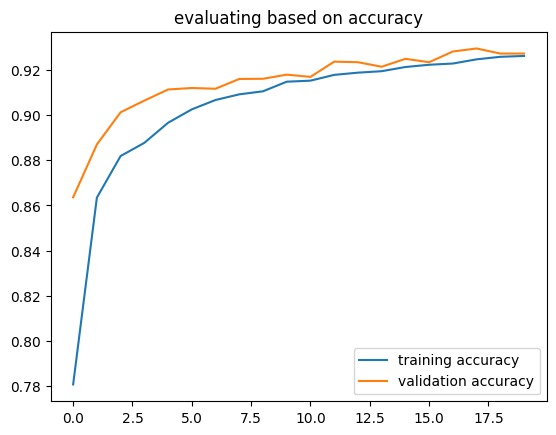

In [45]:
plt.plot(epochs, accuracy, label='training accuracy')
plt.plot(epochs, val_accuracy, label='validation accuracy')
plt.title('evaluating based on accuracy')
plt.legend()
plt.show()

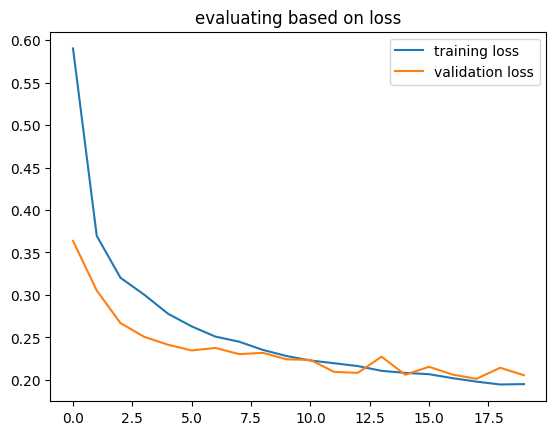

In [46]:
plt.plot(epochs,loss,label='training loss')
plt.plot(epochs,val_loss,label='validation loss')
plt.title('evaluating based on loss')
plt.legend()
plt.show()